In [11]:
!python -m spacy download en_core_web_sm

                                              0.0/12.8 MB ? eta -:--:--
                                              0.0/12.8 MB ? eta -:--:--
                                             0.0/12.8 MB 325.1 kB/s eta 0:00:40
                                             0.1/12.8 MB 409.6 kB/s eta 0:00:32
                                             0.1/12.8 MB 595.3 kB/s eta 0:00:22
                                             0.2/12.8 MB 915.1 kB/s eta 0:00:14
     --                                       0.6/12.8 MB 2.3 MB/s eta 0:00:06
     --                                       0.7/12.8 MB 2.3 MB/s eta 0:00:06
     --                                       0.9/12.8 MB 2.4 MB/s eta 0:00:05
     ---                                      1.0/12.8 MB 2.5 MB/s eta 0:00:05
     ----                                     1.5/12.8 MB 3.3 MB/s eta 0:00:04
     -----                                    1.9/12.8 MB 3.6 MB/s eta 0:00:04
     ------                                   2.2/12.8 MB 3.9 

In [17]:
from datasets import load_dataset

dataset = load_dataset("stanfordnlp/imdb")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [28]:
import numpy as np
from collections import Counter
from transformers import AutoTokenizer
import spacy

In [12]:

hf_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')


In [13]:
spacy_nlp = spacy.load("en_core_web_sm")

In [26]:
hf_tokens = []
max_length = hf_tokenizer.model_max_length

for text in dataset['train']['text'][:1000]:
    tokens = hf_tokenizer.tokenize(text)
    hf_tokens.extend(tokens[:max_length]) 


In [27]:
spacy_tokens = []
for text in dataset['train']['text'][:1000]:
    doc = spacy_nlp(text)
    spacy_tokens.extend([token.text for token in doc])

In [29]:
def calculate_entropy(token_list):
    token_counts = Counter(token_list)
    total_tokens = sum(token_counts.values())
    
    entropy = 0
    for count in token_counts.values():
        prob = count / total_tokens
        entropy -= prob * np.log(prob)
    
    return entropy, token_counts

In [30]:
hf_entropy, hf_token_counts = calculate_entropy(hf_tokens)
print(hf_entropy,"---",hf_token_counts)

6.514699715971917 --- Counter({'.': 12072, 'the': 11730, ',': 9401, 'a': 5734, 'and': 5394, "'": 4926, 'to': 4894, 'of': 4875, '/': 4205, 'br': 3987, '<': 3984, '>': 3981, 'is': 3600, 'it': 3488, 'i': 3436, 'in': 3272, 'this': 2983, 'that': 2637, '-': 2407, '"': 2340, 's': 2124, 'was': 1958, 'movie': 1818, 'for': 1663, 'but': 1468, 'film': 1465, 't': 1451, 'with': 1405, 'as': 1394, 'you': 1259, 'on': 1223, ')': 1185, 'not': 1157, '(': 1149, 'have': 1070, 'are': 1054, 'be': 1053, 'he': 988, '!': 948, 'one': 937, 'so': 920, '##s': 895, 'at': 886, 'they': 886, '?': 886, 'all': 837, 'his': 837, 'like': 787, 'just': 774, 'an': 764, 'by': 762, 'her': 736, 'who': 733, 'or': 691, 'there': 684, 'from': 681, 'if': 638, 'about': 619, 'some': 614, 'out': 611, 'good': 587, 'has': 575, 'what': 570, 'no': 570, 'can': 567, 'bad': 547, 'she': 533, 'even': 513, 'up': 499, 'would': 494, 'more': 492, 'only': 486, 'when': 481, 'really': 454, 'were': 446, 'time': 445, 'story': 443, 'very': 432, 'had': 430, 

In [31]:
spacy_entropy, spacy_token_counts = calculate_entropy(spacy_tokens)
print(spacy_entropy,"---",spacy_token_counts)

6.811911565413144 --- Counter({'the': 11371, ',': 10715, '.': 9588, 'a': 6187, 'and': 5760, 'to': 5479, 'of': 5418, 'is': 4160, 'in': 3406, 'I': 3385, 'it': 3073, 'that': 2836, 'this': 2704, '"': 2578, "'s": 2383, '/><br': 2279, 'was': 2201, '-': 2140, 'movie': 1862, 'for': 1731, 'film': 1586, 'with': 1542, "n't": 1529, 'as': 1503, 'The': 1475, 'but': 1363, 'on': 1340, 'you': 1235, 'are': 1231, '(': 1229, 'have': 1219, ')': 1218, 'not': 1190, 'be': 1161, 'one': 954, 'he': 943, 'his': 941, 'at': 933, '!': 921, '?': 904, 'they': 873, 'so': 855, 'like': 854, 'by': 840, 'all': 839, 'an': 816, 'just': 806, 'her': 787, 'who': 773, 'or': 745, 'from': 743, 'do': 726, 'about': 693, 'It': 668, 'out': 668, 'has': 665, "'": 662, 'some': 627, 'good': 609, 'would': 598, 'more': 556, 'no': 549, 'only': 542, 'bad': 541, 'up': 540, 'were': 521, 'even': 508, 'there': 496, 'can': 495, 'had': 492, 'if': 490, 'which': 488, 'really': 486, 'what': 485, 'she': 472, 'story': 472, 'This': 470, 'time': 457, '...

In [36]:
def get_top_tokens(token_counts, n=1000):
    return sorted(token_counts.items(), key=lambda x: x[1], reverse=True)[:n]

top_hf_tokens = get_top_tokens(hf_token_counts)
top_spacy_tokens = get_top_tokens(spacy_token_counts)
print(top_hf_tokens,"\n",top_spacy_tokens)


[('.', 12072), ('the', 11730), (',', 9401), ('a', 5734), ('and', 5394), ("'", 4926), ('to', 4894), ('of', 4875), ('/', 4205), ('br', 3987), ('<', 3984), ('>', 3981), ('is', 3600), ('it', 3488), ('i', 3436), ('in', 3272), ('this', 2983), ('that', 2637), ('-', 2407), ('"', 2340), ('s', 2124), ('was', 1958), ('movie', 1818), ('for', 1663), ('but', 1468), ('film', 1465), ('t', 1451), ('with', 1405), ('as', 1394), ('you', 1259), ('on', 1223), (')', 1185), ('not', 1157), ('(', 1149), ('have', 1070), ('are', 1054), ('be', 1053), ('he', 988), ('!', 948), ('one', 937), ('so', 920), ('##s', 895), ('at', 886), ('they', 886), ('?', 886), ('all', 837), ('his', 837), ('like', 787), ('just', 774), ('an', 764), ('by', 762), ('her', 736), ('who', 733), ('or', 691), ('there', 684), ('from', 681), ('if', 638), ('about', 619), ('some', 614), ('out', 611), ('good', 587), ('has', 575), ('what', 570), ('no', 570), ('can', 567), ('bad', 547), ('she', 533), ('even', 513), ('up', 499), ('would', 494), ('more', 

In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create Word Clouds for the top 1000 tokens from both tokenizers
hf_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(top_hf_tokens))
spacy_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(top_spacy_tokens))

(-0.5, 799.5, 399.5, -0.5)

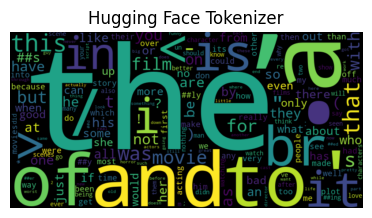

In [43]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(hf_wordcloud, interpolation='bilinear')
plt.title("Hugging Face Tokenizer")
plt.axis('off')

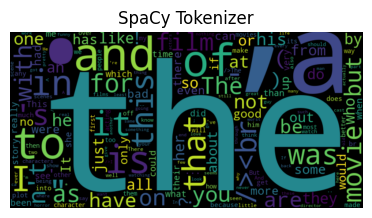

In [45]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.imshow(spacy_wordcloud, interpolation='bilinear')
plt.title("SpaCy Tokenizer")
plt.axis('off')
plt.show()

In [53]:
hf_set = set([token[0] for token in top_hf_tokens])
spacy_set = set([token[0] for token in top_spacy_tokens])

In [58]:
similarity = len(hf_set.intersection(spacy_set)) / len(hf_set.union(spacy_set))
print(f"Similarity between the two token lists: {similarity:.4f}")

Similarity between the two token lists: 0.6488


### Conclusion:
 
1. Hugging Face focuses more on frequent and meaningful subwords, while SpaCy might include more diverse or less frequent words.
2. Hugging Face entropy: 6.51 and SpaCy entropy: 6.81 so that lower entropy suggest less noise 
3. Hugging Face is better for text classification tasks like sentiment analysis. Hugging Face tokenizers are optimized for models like BERT, which rely on frequent patterns and partial-word tokenization